# Chapter 1: Diagramas de dispersión y mapas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Create the dataframe corresponding to 'Image 1.3: Frequencies of Day Types in the Four Trips':

In [3]:
# Define the relative path to the CSV file
data_path = "../data/chapter1.csv"

# Load the data into a DataFrame
df = pd.read_csv(data_path)

# Set 'Country' as the index to facilitate table readability
df.set_index('Country', inplace=True)

# Add a new column 'Total' to represent the sum of each row
df['Total'] = df.sum(axis=1)

# Add a new row 'Total' to represent the sum of each column
df.loc['Total'] = df.sum(axis=0)

# Display the frequency table with totals
print(df)

                Holiday  Half-Day Work  Full-Day Work  Total
Country                                                     
Norway                6              1             11     18
Canada                1              3             11     15
Greece                4             25              0     29
France/Germany        2              2             20     24
Total                13             31             42     86


Create the dataframe corresponding to 'Image 1.5: Percentages of Day Types in Each Trip, as well as Global Percentages, where Each Row Totals 100\%':

In [4]:
# Calculate the percentage DataFrame
# Remove the 'Total' column as it's not needed for percentage calculations
df_percentages = df.drop(columns='Total').div(df['Total'], axis=0) * 100

# Round the percentages to match the presentation style
df_percentages = df_percentages.round(0).astype(int)

# Rename the row 'Total' to 'Global'
df_percentages.rename(index={'Total': 'Global'}, inplace=True)

# Display the percentage table
print(df_percentages)

                Holiday  Half-Day Work  Full-Day Work
Country                                              
Norway               33              6             61
Canada                7             20             73
Greece               14             86              0
France/Germany        8              8             83
Global               15             36             49


Create 'Image 1.4: Diagrams of Absolute Frequencies (a) and Relative Frequencies (b), Expressed as Percentages of Rows from Image 1.3':

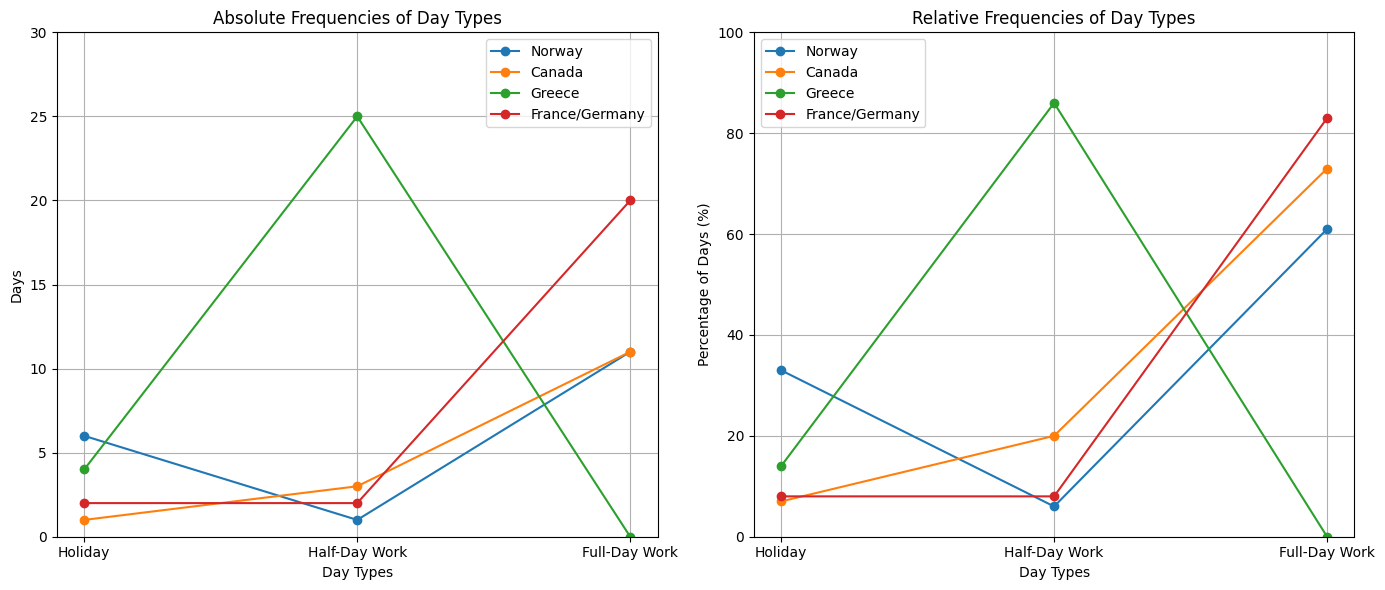

In [5]:
# Plotting absolute frequencies and relative frequencies
plt.figure(figsize=(14, 6))

# Absolute frequencies plot (a)
plt.subplot(1, 2, 1)
for country in df.index:
    if country != 'Total':  # Exclude 'Total' row from plotting
        plt.plot(df.columns[:-1], df.loc[country, df.columns[:-1]], marker='o', linestyle='-', label=country)

plt.xlabel('Day Types')
plt.ylabel('Days')
plt.title('Absolute Frequencies of Day Types')
plt.xticks(rotation=0)
plt.ylim(0, 30)
plt.legend()
plt.grid(True)

# Relative frequencies plot (b)
plt.subplot(1, 2, 2)
for country in df_percentages.index:
    if country != 'Global':  # Exclude 'Global' row from plotting
        plt.plot(df_percentages.columns, df_percentages.loc[country], marker='o', linestyle='-', label=country)

plt.xlabel('Day Types')
plt.ylabel('Percentage of Days (%)')
plt.title('Relative Frequencies of Day Types')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()